In [44]:
import torch
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
import torch.nn as nn
from torch.optim import SGD
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np

train_dataset = MNIST(root="./data", train=True, transform=transforms.ToTensor(), download=True)
test_dataset = MNIST(root="./data", train=False, transform=transforms.ToTensor(), download=True)

image, label = train_dataset[0]
image.shape

torch.Size([1, 28, 28])

In [36]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False, num_workers=0)

In [ ]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()

        self.encoder =  nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=4, kernel_size=(3,3), stride=1, padding=0),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(in_features=4*26*26, out_features=16)
        )

        self.decoder = nn.Sequential(
            nn.Linear(16, 4*26*26),
            nn.Unflatten(1, (4, 26, 26)),
            nn.ConvTranspose2d(4, 1, kernel_size=(3,3), stride=1, padding=0),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [14]:
model = AutoEncoder()

In [28]:
criterion = nn.MSELoss()
optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

AutoEncoder(
  (encoder): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Flatten(start_dim=1, end_dim=-1)
    (3): Linear(in_features=2704, out_features=16, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=16, out_features=2704, bias=True)
    (1): Unflatten(dim=1, unflattened_size=(4, 26, 26))
    (2): ConvTranspose2d(4, 1, kernel_size=(3, 3), stride=(1, 1))
    (3): Sigmoid()
  )
)

In [34]:
def train(model, data_loader, epoch):
    model.train()
    total_loss = []
    for i in tqdm(range(epoch)):
        train_loss = 0
        for image, _ in data_loader:
            image = image.to(device)
            pred = model(image)
            optimizer.zero_grad()
            loss = criterion(image, pred)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        total_loss.append(train_loss)
        avg_loss = train_loss / len(data_loader)
        print(f"Epoch:{i}: Avg_Loss:{avg_loss}")

In [59]:
train(model, train_loader, 20)

  5%|▌         | 1/20 [00:09<02:51,  9.05s/it]

Epoch:0: Avg_Loss:0.04210448581924041


 10%|█         | 2/20 [00:17<02:32,  8.48s/it]

Epoch:1: Avg_Loss:0.04059348429441452


 15%|█▌        | 3/20 [00:25<02:22,  8.38s/it]

Epoch:2: Avg_Loss:0.03925570355703433


 20%|██        | 4/20 [00:33<02:11,  8.25s/it]

Epoch:3: Avg_Loss:0.03806523926903804


 25%|██▌       | 5/20 [00:42<02:05,  8.39s/it]

Epoch:4: Avg_Loss:0.03700357772707939


 30%|███       | 6/20 [00:50<01:56,  8.34s/it]

Epoch:5: Avg_Loss:0.036056484029690423


 35%|███▌      | 7/20 [00:58<01:47,  8.26s/it]

Epoch:6: Avg_Loss:0.035210975836714106


 40%|████      | 8/20 [01:06<01:38,  8.23s/it]

Epoch:7: Avg_Loss:0.03445462064097325


 45%|████▌     | 9/20 [01:14<01:29,  8.14s/it]

Epoch:8: Avg_Loss:0.03377560610771179


 50%|█████     | 10/20 [01:22<01:21,  8.15s/it]

Epoch:9: Avg_Loss:0.03316347173899412


 55%|█████▌    | 11/20 [01:31<01:13,  8.21s/it]

Epoch:10: Avg_Loss:0.0326091977039973


 60%|██████    | 12/20 [01:39<01:06,  8.26s/it]

Epoch:11: Avg_Loss:0.03210472269753615


 65%|██████▌   | 13/20 [01:47<00:57,  8.26s/it]

Epoch:12: Avg_Loss:0.031643240670859815


 70%|███████   | 14/20 [01:55<00:48,  8.12s/it]

Epoch:13: Avg_Loss:0.031219156483312447


 75%|███████▌  | 15/20 [02:03<00:40,  8.19s/it]

Epoch:14: Avg_Loss:0.030827939974268276


 80%|████████  | 16/20 [02:12<00:32,  8.19s/it]

Epoch:15: Avg_Loss:0.030465721785028776


 85%|████████▌ | 17/20 [02:20<00:24,  8.20s/it]

Epoch:16: Avg_Loss:0.030129348363975683


 90%|█████████ | 18/20 [02:28<00:16,  8.08s/it]

Epoch:17: Avg_Loss:0.029816105727354686


 95%|█████████▌| 19/20 [02:36<00:08,  8.16s/it]

Epoch:18: Avg_Loss:0.029523440771301587


100%|██████████| 20/20 [02:44<00:00,  8.23s/it]

Epoch:19: Avg_Loss:0.029249494355916977


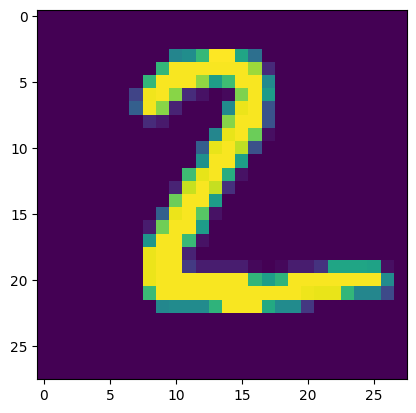

In [60]:
image, label = test_dataset[1]
image_transposed = np.transpose(image, (1, 2, 0))
plt.imshow(image_transposed)
plt.show()

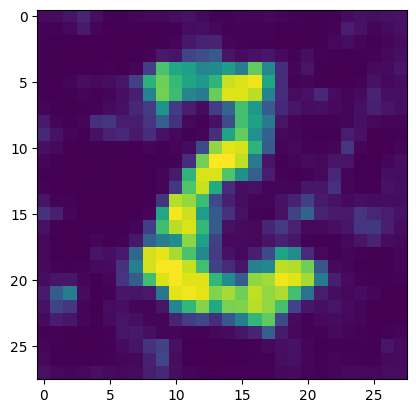

In [61]:
pred = model(image.to(device).unsqueeze(0)).cpu().detach().numpy().squeeze(0)
image_transposed = np.transpose(pred, (1, 2, 0))
plt.imshow(image_transposed)
plt.show()